# Guided GradCAM
In this notebook we explore the utility of guided gradcam and compare it to the standard GradCAM output. 

In [1]:
# Import necessary libraries
from GradCam import GuidedGradCam, GradCam

from torchvision import models as pretrained
from PIL import Image, ImageDraw

from typing import List, Union

import torch

from IPython.display import display
import numpy as np
from imagenet_classes import classes
import torch.nn as nn
import torch
import torch.nn.functional as F
import matplotlib as mpl


from torchvision import transforms
from PIL import Image
from typing import Union, List

/home2/aa_aanegola/miniconda3/envs/torch/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

Using device: cuda


In [3]:
model_guided = pretrained.vgg19(pretrained=True)
model = pretrained.vgg19(pretrained=True)
guided_gc = GuidedGradCam(model_guided, model_guided.features[35], device)
gc = GradCam(model, model.features[35], device)


In [4]:
image = Image.open('./sample_images/dog_and_cat.jpeg')
labels = gc.topk(image, 6)
for lab in labels:
    print(lab, classes[lab])

260 chow, chow chow
207 golden retriever
186 Norwich terrier
273 dingo, warrigal, warragal, Canis dingo
185 Norfolk terrier
281 tabby, tabby cat


CAMs for the 'Golden Retriever' class


/home2/aa_aanegola/miniconda3/envs/torch/lib/python3.9/site-packages/torch/nn/modules/module.py:1033: UserWarning: Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.
  warnings.warn("Using a non-full backward hook when the forward contains multiple autograd Nodes "


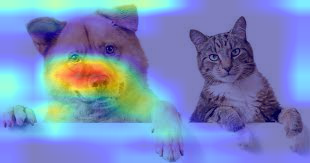

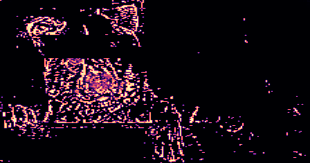

In [5]:
print("CAMs for the 'Golden Retriever' class")
cam = gc(image, torch.tensor([207]))
guided_cam = guided_gc(image, torch.tensor([207]))
display(cam)
display(guided_cam)

CAMs for the 'Tabby Cat' class


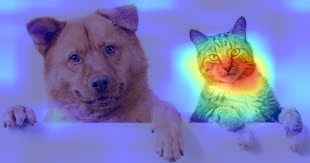

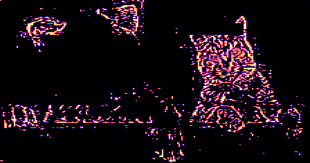

In [6]:
print("CAMs for the 'Tabby Cat' class")
cam = gc(image, torch.tensor([281]))
guided_cam = guided_gc(image, torch.tensor([281]))
display(cam)
display(guided_cam)

In [7]:
image = Image.open('./sample_images/tiger.jpeg')
labels = gc.topk(image, 6)
for lab in labels:
    print(lab, classes[lab])

292 tiger, Panthera tigris
282 tiger cat
340 zebra
287 lynx, catamount
290 jaguar, panther, Panthera onca, Felis onca
281 tabby, tabby cat


CAMs for the 'Panthera Tigris (Tiger)' class


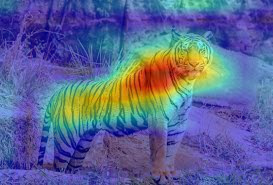

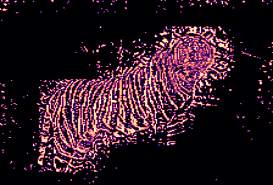

In [8]:
print("CAMs for the 'Panthera Tigris (Tiger)' class")
cam = gc(image, torch.tensor([292]))
guided_cam = guided_gc(image, torch.tensor([292]))
display(cam)
display(guided_cam)

As we can see, guided GradCAM makes it easier for humans to interpret GradCAM output by interleaving it with the original image. The classification result is also interpretable, as we can see the network identifies the snout and the ears for the golden retriever class, and the ears and the face for the tabby cat class. Interestingly the network also identifies the ears of the dog as an indication that the animal is a cat indicating that the network struggles to differentiate between cat and dog ears locally. In the picture of the tiger, the GradCAM indicates the region of interest, but guided GradCAM preserves the stripes as well which is a much better indication of why the network classifies the image as a tiger. 